# 台灣再生能源發展與相關就業趨勢
#### 作者：蔡旻諺－成大土木系
## 動機與目的
由於溫室效應對於環境的影響，以及提倡創造一個非核家園，考慮在不影響產生電力供給的條件下，紛紛提倡採用再生能源，而在世界各地再生能源已經廣泛的被使用，例:美國、中國與丹麥，但在世界各地使用再生能源推動之下，台灣在最近幾年也漸漸開始重視永續發展而推動了"離岸風機前瞻計畫"，在彰化外海設
置風機以台灣海峽海風借電，在此之前對於太陽能發電也是很夯的議題，時常在路上看到自家住宅架設太陽能板發電。

隨著時代的演進，再生能源成為大家朗朗上口的詞彙，但是在台灣再生能源的發展是否能逐漸的取代會對環境產生影響的發電來源如火力、核能，探討對於近幾年台灣發電結構分配的種類以及相對於總發電量各發電種類的成長或衰減，是否在逐漸推動下再生能源有效地取代部分原本用來發電的大宗，若反之，什麼原因
造成這樣的趨勢?以及再生能源逐漸推動下，何種類型的發電系統取佔據了大部分的再生能源發電量?

最後想探討隨著政府推動再生能源的普及化下，也會對台灣的社會帶來部分的經濟效益，由於在該政策下需要許多不同領域的人才來一起推動，因此在這邊想分析統計大多數能參與再生能源推廣的領域科系是哪些?

這份報告希望能觀察到現在台灣能源的比例，再生能源近幾年發電量增長的幅度，以及再生能源需要哪些科系的公司來使其進行之分布圖。

# 資料統計分析
## 1. 台灣能源分布比例
### 資料選取匯入

In [9]:
import urllib
import urllib.request
import urllib.error
import csv
import pandas
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup 
url = 'https://www.taipower.com.tw/tc/chart/data/%E5%8F%B0%E9%9B%BB%E7%B3%BB%E7%B5%B1%E6%AD%B7%E5%B9%B4%E7%99%BC%E9%9B%BB%E9%87%8F%E5%88%86%E4%B8%83%E9%A1%9E(39-106).csv'
try:
    urllib.request.urlretrieve(url, 'data_eletric_years.csv')
except urllib.error.HTTPError as ex:
    print('Problem:', ex)
req = pandas.read_csv('data_eletric_years.csv')
select = pandas.DataFrame(req)
select.head()

,年,再生能源,汽電共生,燃氣,燃油,燃煤,抽蓄水力,核能
0,39,9.7,0.0,0.0,0.0,0.7,0.0,0.0
1,40,11.6,0.0,0.0,0.0,1.2,0.0,0.0
2,41,12.3,0.0,0.0,0.0,1.9,0.0,0.0
3,42,14.6,0.0,0.0,0.0,1.0,0.0,0.0
4,43,15.6,0.0,0.0,0.0,2.4,0.0,0.0


資料的選取上採用台灣電力公司內部的開放的資料庫，由於台灣電力公司為台灣知名之公司且有有效的供給各種不同資料、資料的時間點也拉的比較長，在資料中統計了從民國39～106年各年度採用不同能源進行發電的總量，資料的抓取上採用如以上程式碼所示，將網址處*.csv檔下載放置內部資料夾以方便下一步對可利用之資料進行視覺化討論。

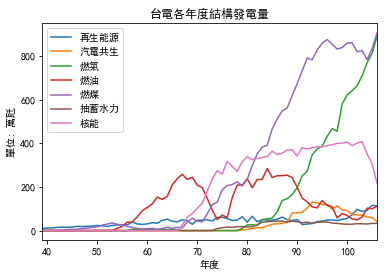

In [8]:

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
legd = [ u'年',u'再生能源', u'汽電共生', u'燃氣', u'燃油', u'燃煤', u'抽蓄水力', u'核能']
x = select.iloc[:,0]
for i in range(1,8):
    newable = select.iloc[:,i]
    plt.plot(x,newable,label=legd[i])
plt.title(u'台電各年度結構發電量')
plt.xlim(39,106)
plt.xlabel('年度')
plt.ylabel('單位: 萬瓩')
plt.legend()
plt.show()

從每年分佈圖上我們可以得到下列幾個論點:
- 核能發電由於近幾年的使用的程度越來越少了。
- 減少核能發電後取而代之的是使用燃煤與燃氣供電。
- 推動的再生能源隨著近幾年政策有緩慢的成長。
- 最近幾年最常使用的發電系統依然是火力發電。

這邊可以說在民國100年之前對於再生能源的意識還沒有很明顯，到了現在再生能源成為家喻戶曉的話題，但為什麼在電力供給上，火力發電還是佔大多數? 以下探討台灣常用之再生能源的系統與缺點:
1. 再生能源取用不易，容易受天候影響，如風力發電則須考慮季節季風的機率。
2. 相對於之前用的發電系統，再生能源建構的成本非常高。
3. 再生能源無法24小時運作，因此假設以一天為單位的話，火力與核能等等發電量還是比較高。
但由於現在推廣再生能源，以後也會成為未來的趨勢，在以下細分再生能源探討何種發電結構常使用於發電，以及最近幾年發電類型的轉變或是使用的增長。

## 2. 再生能源比例分布
### 選取資料匯入(台灣電力公司)

In [3]:
url = 'http://data.taipower.com.tw/opendata/apply/file/d007013/%E5%8F%B0%E7%81%A3%E9%9B%BB%E5%8A%9B%E5%85%AC%E5%8F%B8_%E5%90%84%E5%B9%B4%E5%BA%A6%E5%86%8D%E7%94%9F%E8%83%BD%E6%BA%90%E5%88%A5%E8%A3%9D%E7%BD%AE%E5%AE%B9%E9%87%8F.csv'
try:  
    urllib.request.urlretrieve(url, 'data_renew_years.csv')
except urllib.error.HTTPError as ex:
    print('Problem:', ex)
req = pandas.read_csv('data_renew_years.csv')
select = pandas.DataFrame(req)
select.head()

,年度,風力(萬瓩),太陽電(萬瓩),其他(含水力)(萬瓩),總計(萬瓩)
0,97,24.60,0.25,193.79,218.63
1,98,34.69,0.55,193.69,228.93
2,99,47.15,0.70,197.74,245.59
3,100,51.83,4.44,204.07,260.33
4,101,58.50,13.25,208.13,279.87


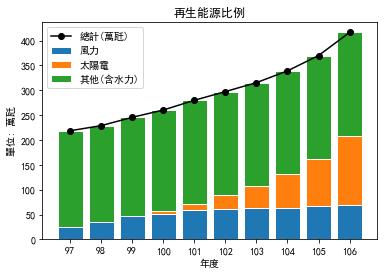

In [10]:
legd = [ u'年',u'風力', u'太陽電', u'其他(含水力)']
x = select.iloc[:,0]
plus=[]
for i,j in zip(select.iloc[:,1] ,select.iloc[:,2]):
    plus.append(i+j)
# plot bar
plt.bar(x,select.iloc[:,1],label=legd[1],edgecolor='white')
plt.bar(x,select.iloc[:,2],label=legd[2],edgecolor='white',bottom=select.iloc[:,1])
plt.bar(x,select.iloc[:,3],label=legd[3],edgecolor='white',bottom=plus)
# plot with total used eletric
plt.plot(x,select.iloc[:,4],marker='o',color='black')
plt.xlabel('年度')
plt.ylabel('單位: 萬瓩')
plt.xticks(x)
plt.title('再生能源比例')
plt.legend()
plt.show()

這張圖資料來源為台灣電力公司，資料集從民國97年～106年針對再生能源發電的總量再去細分出不同能源類型對於整體佔據的數量，從圖表上得知:
- 再生能源的發電量隨著年成長而成長。
- 太陽能發電與風力發電經過這幾年有比較明顯的成長。
使用再生能源對於環境保護以及永續發展有很好的幫助，從另一方面來看在使用再生能源之前，建造再生能源也是一項必須的工作，尤其是建構的成本都是相當的高，因此對於建構過程中對於台灣經濟的推動也會有影響，但是在這方面需要很多領域的共同合作才能達成這項建立出能供電的再生能源機具這樣的目標，因此想觀察在這項永續發展的推動下需要哪種領域的人才，也能讓不知道自己的專業能否參與這樣的計畫的人有初步的了解。

## 3. 再生能源行業之科系領域統計
在本節以爬取台灣104人力銀行搜尋與再生能源相關之關鍵字，再將網頁中不同領域公司類型做為範本，最終目標是想將統計過後的統計資料讓各種不同領域的人像我，在半年前完全不知道有這個行業，直到聽過了幾場的演講後發現原來土木也可以參與再生能源的案子，且在搜尋過一些資料後發現在這個領域中需要很多不同科系的人來共同完成，因此我也好奇到底有哪些科系佔了大多數的需求以及分布較少的科系來做為觀察。

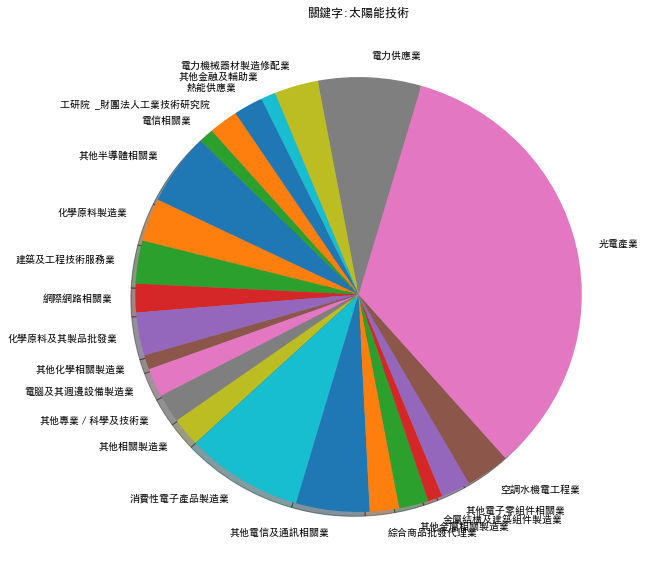

In [11]:
job_tp=[]
for num in range(1,6):
    time.sleep(3)
    page_num = 'page='+ str(num)
    url='https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E5%A4%AA%E9%99%BD%E8%83%BD%E6%8A%80%E8%A1%93&order=12&asc=0&'+page_num+'&mode=s&jobsource=keyword2Keyword'
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text,'html.parser')
    arcs = soup.select('div.b-block__left li')
    for arc in arcs:
        if '業' in arc.text and not '公司' in arc.text:
            job_tp.append(arc.text)
        else:pass
job_item = set(job_tp)
job_dict = {}
for number in job_item:
    job_dict[number] = job_tp.count(number)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,10))
num = [x for x in range(len(job_dict))]
plt.title('關鍵字:太陽能技術')
b = plt.pie(job_dict.values(),labels=list(job_item),
        shadow=True, startangle=135)
plt.show()

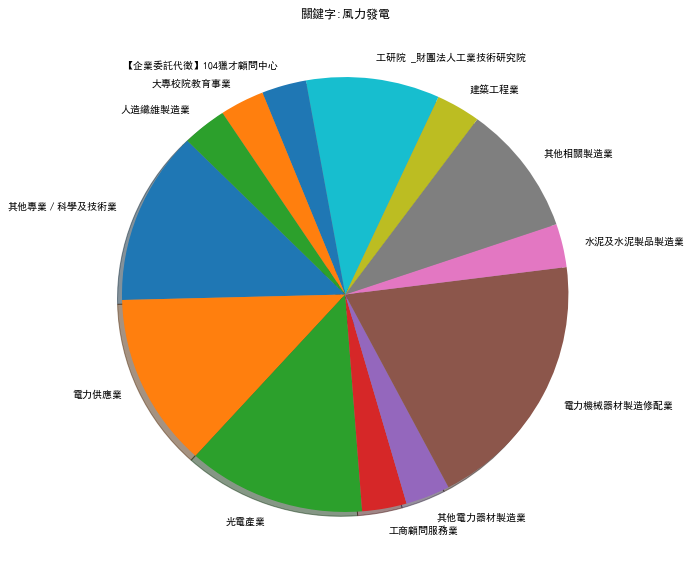

In [14]:
job_tp=[]
for num in range(1,4):
    time.sleep(3)
    page_num = 'page='+ str(num)
    url ='https://www.104.com.tw/jobs/search/?ro=0&kwop=7&keyword=%E9%A2%A8%E5%8A%9B%E7%99%BC%E9%9B%BB&order=12&asc=0&'+page_num+'&mode=s'
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text,'html.parser')
    arcs = soup.select('div.b-block__left li')
    for arc in arcs:
        if '業' in arc.text and not '公司' in arc.text :
            job_tp.append(arc.text)
        else:pass
job_item = set(job_tp)
job_dict = {}
for number in job_item:
    job_dict[number] = job_tp.count(number)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,10))
num = [x for x in range(len(job_dict))]
plt.title('關鍵字:風力發電')
b = plt.pie(job_dict.values(),labels=list(job_item),
        shadow=True, startangle=135)
plt.show()

這邊比較搜尋結果**風力發電**與**太陽能**兩種不同能源在104人力銀行公司種類的分布情形，
第一張圖搜尋**太陽能技術**可以直覺的想到太陽能廠運用光與熱兩種來發電，光電產業佔了大多數的比例，其餘的公司雖然分布較少，但在該產業中都是不可缺少的，例如機械維修、建築建造等等...。
搜尋第二張圖**風力發電**的情況下，分布情形比搜尋太陽能技術較為平均。
觀察兩張圖的反應下:
- 進行再生能源的公司以光電產業佔據大多數，在太陽能以及風力發電的案例中有如此的趨勢。
- 能夠參與再生能源開發的公司在不同領域中分布很廣，在建造、維修、營運上都需要有各方面專長的工作者來勝任。
- 推動再生能源的實施下，未來不僅能使地球永續發展，在經濟的發展下不只有光電、機械類的公司，也需要很多不同科系的人來使齒輪繼續轉動。


# 總結

1. 在發電能源結構上，再生能源依然還沒取代大多數原本對環境有影響的發電系統。
2. 因應政策下再生能源發電量有逐漸增長的趨勢，且太陽能與風力發電增長幅度較大。
3. 進行再生能源發展之公司不僅僅是原本科系相關，也有許多部分需要其他的專業。

從這些資料上我觀察到對於再生能源的使用量是逐年增長的，也會成為未來的一個趨勢，在這樣的使用下能有效地取代原本的發電系統，另外一方面太陽能發電與風力發電的使用量也逐年增長也備受政府的關注，代表需要更多人力投入去發展，在台灣可能是另外一條的出路，因此統計了104人力銀行現在公司職缺的比例，從圖來顯示能有效地的表達科系公司的分布，例如土木系可能不是主要再生能源公司發展的對象，但是在建造過程中就需要土木建築專業的人才去建造，才能使後面的工作進行，因此隨著再生能源發展會是另外一條工作的出路，從這分析中可以初步的得知哪些領域的公司會參與其中，也能讓相關科系的人才有更多的出路去選擇。

# 資料來源
1. 台灣電力公司
2. 經濟部能源處
3. 政府開放平台
4. 104人力網站